# **UrbanWear - Análise de Vendas**

## **Funções e bibliotecas necessárias para o projeto**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

## **Iniciando o projeto utilizando a metodologia CRISP-DM**

### **1.0 - Entendimento do Negócio**

#### **Contextualização**

A UrbanWear é uma empresa fictícia do setor de moda que atua tanto em lojas físicas quanto em e-commerce.
Nos últimos anos, o mercado de vestuário tem passado por transformações significativas devido ao avanço do comércio online, mudanças no comportamento do consumidor e aumento da concorrência digital.

A direção da empresa busca entender:

O desempenho histórico das vendas entre 2018 e 2024.

O impacto do crescimento do e-commerce em comparação à loja física.

A evolução do ticket médio e da participação percentual de cada canal.

Essas informações são fundamentais para apoiar decisões estratégicas sobre investimentos, expansão digital e manutenção da relevância das lojas físicas.

#### **Objetivo:**

Compreender o comportamento de vendas da UrbanWear entre 2018 e 2024 e apoiar decisões estratégicas.

#### **Questões de negócio:**
1. Qual canal de vendas apresentou maior taxa de crescimento?
2. Existe risco da loja física perder relevância diante do online?
3. Qual o ticket médio por canal?

### **2.0 - Entendimento dos Dados**

#### **Sobre os Dados**

Dados disponíveis na própria pasta do projeto na subpasta /data

#### **Descrição das Colunas**

**Data**

Data em que as vendas foram registradas. Essa coluna é fundamental para análises temporais, como identificar sazonalidade, tendências e variações mensais/anuais.

**Canal**

Representa o canal de vendas utilizado (ex.: Loja Física, E-commerce, Parceiros, etc.). Essencial para avaliar a performance de cada canal e identificar mudanças no comportamento de compra dos clientes.

**Região**

Região geográfica onde a venda foi realizada. Essa variável permite análises geográficas, ajudando a entender onde estão os maiores mercados e oportunidades de expansão.

**Quantidade_Vendas**

Número de unidades vendidas em determinada transação ou período. Permite medir volume de vendas e cruzar com a receita para entender ticket médio e lucratividade.

**Receita_Bruta**

Valor monetário bruto das vendas (em reais). É a métrica principal de desempenho financeiro e permite mensurar crescimento, lucratividade e eficiência dos canais e regiões.



#### **Coletando os dados**

In [2]:
df = pd.read_csv(r'data/urbanwear_sales.csv', sep=',')
df.head()

,Data,Canal,Região,Quantidade_Vendas,Receita_Bruta
0,2018-01-01,Loja Física,Nordeste,83,6862.82
1,2018-01-01,E-commerce,Sudeste,26,1913.43
2,2018-01-01,E-commerce,Norte,156,13075.65
3,2018-01-01,Loja Física,Sudeste,48,3674.25
4,2018-01-01,Loja Física,Nordeste,64,5158.49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               840 non-null    object 
 1   Canal              840 non-null    object 
 2   Região             840 non-null    object 
 3   Quantidade_Vendas  840 non-null    int64  
 4   Receita_Bruta      840 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 32.9+ KB


In [4]:
print(f"{df.duplicated().sum() / df['Data'].count():.2%} do Dataframe possui registros duplicados")

0.00% do Dataframe possui registros duplicados


In [5]:
df.isna().sum()

Data                 0
Canal                0
Região               0
Quantidade_Vendas    0
Receita_Bruta        0
dtype: int64

**Diagnóstico de qualidade dos dados**

    Não há valores ausentes ou nulos.

    Não Existem duplicados

**Resumo estatístico das variáveis (numéricas e categóricas)**

In [6]:
# Variáveis numéricas
display(df.describe().T)
        
# Variáveis categóricas
display(df.describe(include=['object']))

,count,mean,std,min,25%,50%,75%,max
Quantidade_Vendas,840.0,126.044048,108.815123,13.00,53.7500,84.000,163.0000,720.00
Receita_Bruta,840.0,10448.790560,9271.022437,991.19,4346.4725,6934.985,13624.9275,62459.97


,Data,Canal,Região
count,840,840,840
unique,84,3,5
top,2018-01-01,Loja Física,Sudeste
freq,10,440,351


In [7]:
# Contagem de valores únicos em cada variável categórica
for col in ['Canal', 'Região']:
    print('---')
    print(df[col].value_counts())

---
Canal
Loja Física    440
E-commerce     359
Parceiros       41
Name: count, dtype: int64
---
Região
Sudeste         351
Nordeste        173
Sul             151
Centro-Oeste     88
Norte            77
Name: count, dtype: int64


In [12]:
# Garantindo que a coluna Data seja datetime
df["Data"] = pd.to_datetime(df["Data"])

# Criando colunas auxiliares de Ano e Mês
df["Ano"] = df["Data"].dt.year
df["Mes"] = df["Data"].dt.month

#### **Gráficos da análise exploratória dos dados**

In [17]:
# Configurações globais de cores dos gráficos
cores = plt.get_cmap('Pastel1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

**Distribuição das Variáveis Numéricas**

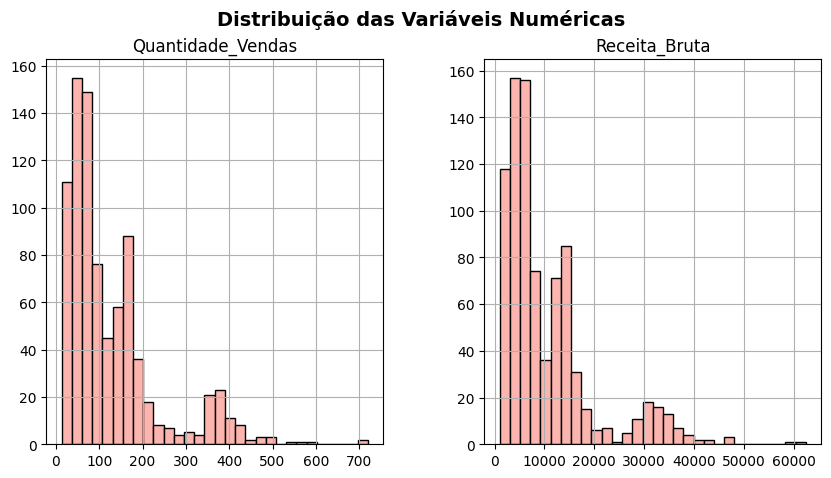

In [20]:
num_cols = ["Quantidade_Vendas", "Receita_Bruta"]

df[num_cols].hist(bins=30, figsize=(10,5), edgecolor="black")
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=14, fontweight="bold")
plt.show()

**Análise dos gráficos de distrubuição das variáveis numéricas**

1. Quantidade_Vendas

    Média: 126 unidades por transação.

    Mediana: 84 unidades → mostra que metade das vendas são menores que esse valor.

   Desvio padrão: 108 → indica grande variabilidade nas quantidades vendidas.

    Mínimo: 13 unidades.

    Máximo: 720 unidades.

   Interpretação:

       A distribuição é assimétrica à direita (muitos valores baixos e poucos valores muito altos).

       Isso significa que a maioria dos clientes compra pequenas/médias quantidades, mas existem casos de compras em lote bem maiores (pode ser compra corporativa, promoção ou sazonalidade).

2. Receita_Bruta

    Média: R$ 10.449 por venda.

    Mediana: R$ 6.935 → valor bem abaixo da média, confirmando a assimetria positiva (algumas vendas muito grandes puxam a média para cima).

    Desvio padrão: R$ 9.271 → alto, mostrando grande dispersão entre os valores das vendas.

    Mínimo: R$ 991.

    Máximo: R$ 62.460.

    Interpretação:

        A maioria das transações gera receita entre R$ 4.000 e R$ 13.000 (faixa interquartílica).

        Existem algumas vendas extremamente altas, que funcionam como outliers positivos.

        Isso é comum em negócios de moda quando existem compras grandes para revenda, datas comemorativas (Black Friday, Natal) ou até coleções exclusivas.